In [67]:
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.test_env import TestEnv
import numpy as np
import matplotlib.pyplot as plt
import time
from bettermdptools.utils.callbacks import Callbacks, MyCallbacks

In [68]:

# make gym environment 
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None, is_slippery=True)
frozen_lake.reset(seed=42)

(0, {'prob': 1})

In [203]:
# RL
RL_med = RL(frozen_lake)
Q, V, pi, Q_track, pi_track = RL_med.q_learning(
    gamma=.99, init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5, 
    init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9, n_episodes=100000
)

  0%|          | 0/100000 [00:00<?, ?it/s]

  1%|          | 1245/100000 [00:00<00:41, 2381.27it/s]/home/suhendro/miniconda3/envs/mlhw4/lib/python3.10/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")
                                                        

runtime = 75.45 seconds


In [219]:
a = []
for i in range(50):
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi_track[49999], user_input=False)
    a.append(test_scores)
print(np.mean(a))

0.8564


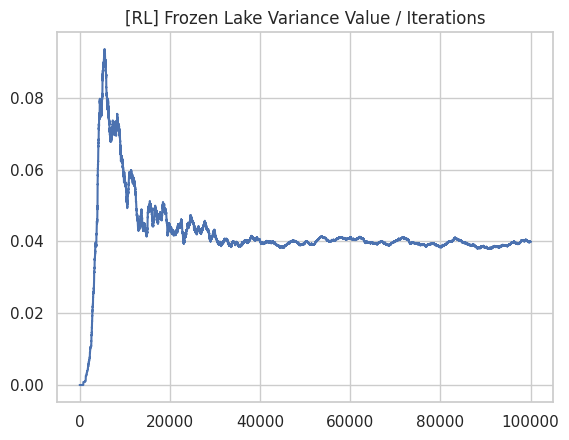

In [220]:
max_value_per_iter = np.var(Q_track, axis=(1,2))
Plots.v_iters_plot(max_value_per_iter, "[RL] Frozen Lake Variance Value / Iterations")

In [191]:
np.argmin(np.var(Q_track, axis=(1,2))[43030:])

1198

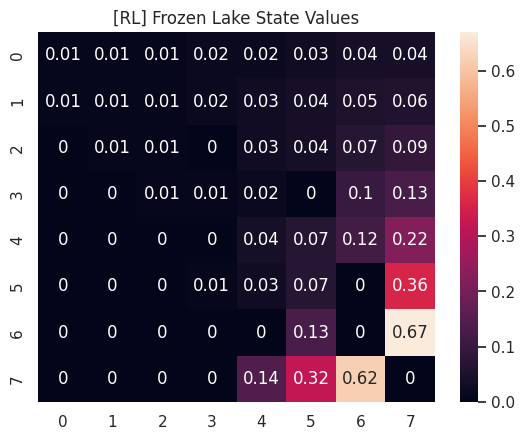

In [71]:
#state values plot
size=(8,8)
Plots.values_heat_map(V, "[RL] Frozen Lake State Values", size)

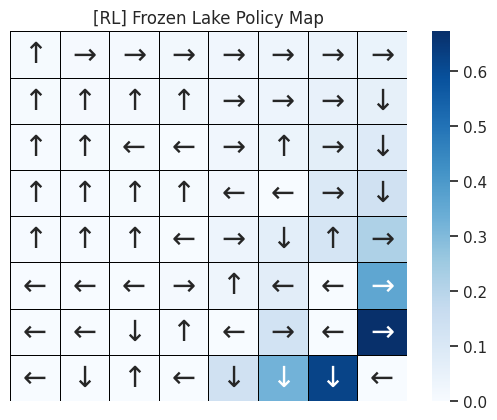

In [72]:

# policy map plot
frozen_lake_map_size = (8,8)
# frozen_lake_action ={
#     0: "Left",
#     1: "Down",
#     2: "Right",
#     3: "Up"
# }
frozen_lake_action = {0: "←", 1: "↓", 2: "→", 3: "↑"}

val_max, policy_map = Plots.get_policy_map(pi, V, frozen_lake_action, frozen_lake_map_size)

#plot policy map
title="[RL] Frozen Lake Policy Map"
Plots.plot_policy(val_max, policy_map, frozen_lake_action, title)